In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
concrete_data = pd.read_csv('concrete.csv')
concrete_data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
concrete_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
concrete_data.isnull().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

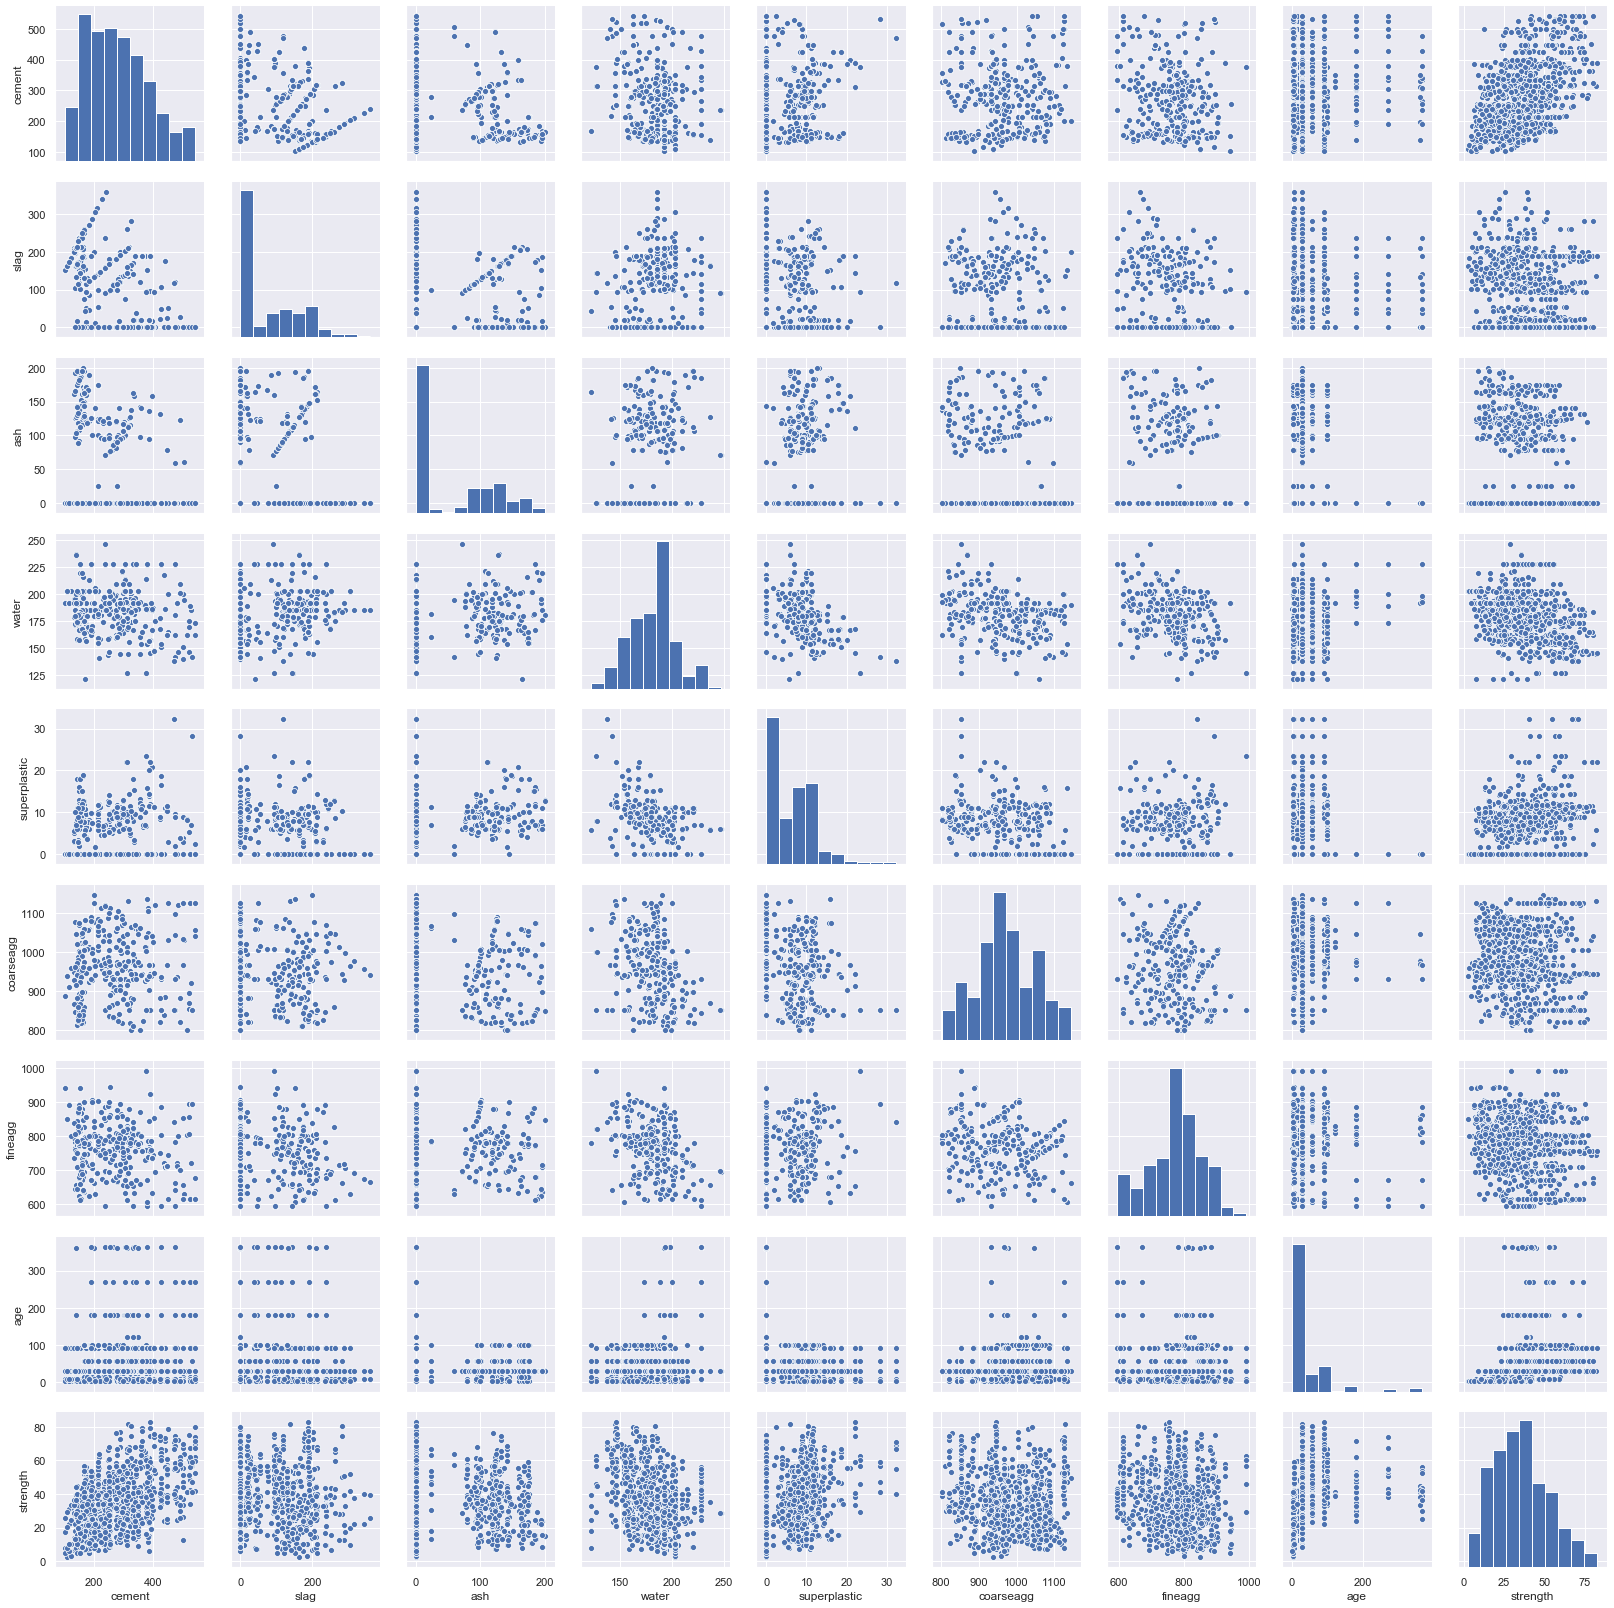

In [5]:
sns.pairplot(concrete_data)
plt.show()

In [6]:
concrete_data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [7]:
train, test = train_test_split(concrete_data, test_size=0.2, random_state=42)

trainX = train.drop(['strength'], axis=1)
trainY = train['strength']

testX = test.drop(['strength'], axis=1)
testY = test['strength']

In [8]:
trainX

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
995,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365
507,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,28
334,323.7,282.8,0.0,183.8,10.3,942.7,659.9,3
848,252.3,0.0,98.8,146.3,14.2,987.8,889.0,56
294,238.2,158.8,0.0,185.7,0.0,1040.6,734.3,28
...,...,...,...,...,...,...,...,...
87,212.5,0.0,100.4,159.3,8.7,1007.8,903.6,14
330,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,14
466,439.0,177.0,0.0,186.0,11.1,884.9,707.9,3
121,250.0,0.0,95.7,191.8,5.3,948.9,857.2,56


## Model 1

In [9]:
model = Sequential()

model.add(Dense(15, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [10]:
trainX.shape

(824, 8)

In [11]:
model.fit(np.array(trainX), np.array(trainY), epochs=100)

Epoch 1/100
26/26 [==============================] - 0s 865us/step - loss: 1457.1525 - mse: 1457.1525
Epoch 2/100
26/26 [==============================] - 0s 795us/step - loss: 278.5096 - mse: 278.5096
Epoch 3/100
26/26 [==============================] - 0s 735us/step - loss: 247.5211 - mse: 247.5211
Epoch 4/100
26/26 [==============================] - 0s 881us/step - loss: 232.9105 - mse: 232.9105
Epoch 5/100
26/26 [==============================] - 0s 734us/step - loss: 221.5061 - mse: 221.5061
Epoch 6/100
26/26 [==============================] - 0s 711us/step - loss: 207.5080 - mse: 207.5080
Epoch 7/100
26/26 [==============================] - 0s 748us/step - loss: 192.6462 - mse: 192.6462
Epoch 8/100
26/26 [==============================] - 0s 718us/step - loss: 177.7447 - mse: 177.7447
Epoch 9/100
26/26 [==============================] - 0s 681us/step - loss: 159.5320 - mse: 159.5320
Epoch 10/100
26/26 [==============================] - 0s 689us/step - loss: 139.6008 - mse: 139.60

26/26 [==============================] - 0s 809us/step - loss: 44.2610 - mse: 44.2610
Epoch 84/100
26/26 [==============================] - 0s 879us/step - loss: 46.1459 - mse: 46.1459
Epoch 85/100
26/26 [==============================] - 0s 771us/step - loss: 44.7888 - mse: 44.7888
Epoch 86/100
26/26 [==============================] - 0s 801us/step - loss: 43.9503 - mse: 43.9503
Epoch 87/100
26/26 [==============================] - 0s 938us/step - loss: 44.7899 - mse: 44.7899
Epoch 88/100
26/26 [==============================] - 0s 785us/step - loss: 44.7407 - mse: 44.7407
Epoch 89/100
26/26 [==============================] - 0s 676us/step - loss: 44.1002 - mse: 44.1002
Epoch 90/100
26/26 [==============================] - 0s 682us/step - loss: 44.5931 - mse: 44.5931
Epoch 91/100
26/26 [==============================] - 0s 690us/step - loss: 43.9716 - mse: 43.9716
Epoch 92/100
26/26 [==============================] - 0s 698us/step - loss: 46.8134 - mse: 46.8134
Epoch 93/100
26/26 [===

In [12]:
pred_train = model.predict(np.array(trainX))
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean(pred_train - trainY)**2)
rmse_value

0.9545808882598414

In [13]:
pred_test = model.predict(np.array(testX))
pred_test = pd.Series([i[0] for i in pred_test])
rmse_test_value = np.sqrt(np.mean(pred_test - testY)**2)
rmse_test_value

4.035211542569673

## Model 2

In [14]:
model_new = Sequential()

model_new.add(Dense(15, input_dim=8, kernel_initializer='normal', activation='relu'))
model_new.add(Dense(12, activation='relu'))
model_new.add(Dense(1))

model_new.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [15]:
model_new.fit(np.array(trainX), np.array(trainY), epochs=100)

Epoch 1/100
26/26 [==============================] - 0s 912us/step - loss: 429.6746 - mse: 429.6746
Epoch 2/100
26/26 [==============================] - 0s 763us/step - loss: 294.7681 - mse: 294.7681
Epoch 3/100
26/26 [==============================] - 0s 688us/step - loss: 235.5187 - mse: 235.5187
Epoch 4/100
26/26 [==============================] - 0s 702us/step - loss: 198.7045 - mse: 198.7045
Epoch 5/100
26/26 [==============================] - 0s 684us/step - loss: 168.4992 - mse: 168.4992
Epoch 6/100
26/26 [==============================] - 0s 678us/step - loss: 148.2309 - mse: 148.2309
Epoch 7/100
26/26 [==============================] - 0s 677us/step - loss: 133.2785 - mse: 133.2785
Epoch 8/100
26/26 [==============================] - 0s 674us/step - loss: 126.7060 - mse: 126.7060
Epoch 9/100
26/26 [==============================] - 0s 730us/step - loss: 117.4587 - mse: 117.4587
Epoch 10/100
26/26 [==============================] - 0s 674us/step - loss: 109.4373 - mse: 109.4373

26/26 [==============================] - 0s 662us/step - loss: 41.1707 - mse: 41.1707
Epoch 84/100
26/26 [==============================] - 0s 657us/step - loss: 39.7576 - mse: 39.7576
Epoch 85/100
26/26 [==============================] - 0s 659us/step - loss: 41.9920 - mse: 41.9920
Epoch 86/100
26/26 [==============================] - 0s 657us/step - loss: 42.0101 - mse: 42.0101
Epoch 87/100
26/26 [==============================] - 0s 669us/step - loss: 40.9458 - mse: 40.9458
Epoch 88/100
26/26 [==============================] - 0s 638us/step - loss: 41.6265 - mse: 41.6265
Epoch 89/100
26/26 [==============================] - 0s 666us/step - loss: 42.3094 - mse: 42.3094
Epoch 90/100
26/26 [==============================] - 0s 659us/step - loss: 41.1443 - mse: 41.1443
Epoch 91/100
26/26 [==============================] - 0s 655us/step - loss: 40.1150 - mse: 40.1150
Epoch 92/100
26/26 [==============================] - 0s 665us/step - loss: 39.9460 - mse: 39.9460
Epoch 93/100
26/26 [===

In [16]:
pred_train = model_new.predict(np.array(trainX))
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean(pred_train - trainY)**2)
rmse_value

0.0013942958899294654

In [17]:
pred_test = model_new.predict(np.array(testX))
pred_test = pred_test.ravel()
rmse_test_value = np.sqrt(np.mean(pred_test - testY)**2)
rmse_test_value

0.06453756258325687

## Model 3

In [18]:
model_third = Sequential()

model_third.add(Dense(15, input_dim=8, kernel_initializer='normal', activation='relu'))
model_third.add(Dense(12, activation='relu'))
model_third.add(Dense(12, activation='relu'))
model_third.add(Dense(1))

model_third.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [19]:
model_third.fit(np.array(trainX), np.array(trainY), epochs=200)

Epoch 1/200
26/26 [==============================] - 0s 818us/step - loss: 2068.4829 - mse: 2068.4829
Epoch 2/200
26/26 [==============================] - 0s 739us/step - loss: 660.5700 - mse: 660.5700
Epoch 3/200
26/26 [==============================] - 0s 704us/step - loss: 282.2121 - mse: 282.2121
Epoch 4/200
26/26 [==============================] - 0s 695us/step - loss: 262.2239 - mse: 262.2239
Epoch 5/200
26/26 [==============================] - 0s 685us/step - loss: 252.8533 - mse: 252.8533
Epoch 6/200
26/26 [==============================] - 0s 684us/step - loss: 245.5000 - mse: 245.5000
Epoch 7/200
26/26 [==============================] - 0s 788us/step - loss: 235.6613 - mse: 235.6613
Epoch 8/200
26/26 [==============================] - 0s 1ms/step - loss: 227.7514 - mse: 227.7514
Epoch 9/200
26/26 [==============================] - 0s 994us/step - loss: 219.6163 - mse: 219.6163
Epoch 10/200
26/26 [==============================] - 0s 759us/step - loss: 211.9999 - mse: 211.9999

26/26 [==============================] - 0s 718us/step - loss: 50.5788 - mse: 50.5788
Epoch 84/200
26/26 [==============================] - 0s 703us/step - loss: 50.6863 - mse: 50.6863
Epoch 85/200
26/26 [==============================] - 0s 684us/step - loss: 50.0439 - mse: 50.0439
Epoch 86/200
26/26 [==============================] - 0s 702us/step - loss: 50.3391 - mse: 50.3391
Epoch 87/200
26/26 [==============================] - 0s 710us/step - loss: 48.7508 - mse: 48.7508
Epoch 88/200
26/26 [==============================] - 0s 706us/step - loss: 48.6713 - mse: 48.6713
Epoch 89/200
26/26 [==============================] - 0s 694us/step - loss: 49.0454 - mse: 49.0454
Epoch 90/200
26/26 [==============================] - 0s 681us/step - loss: 48.7045 - mse: 48.7045
Epoch 91/200
26/26 [==============================] - 0s 707us/step - loss: 50.6629 - mse: 50.6629
Epoch 92/200
26/26 [==============================] - 0s 695us/step - loss: 52.9436 - mse: 52.9436
Epoch 93/200
26/26 [===

26/26 [==============================] - 0s 909us/step - loss: 47.0216 - mse: 47.0216
Epoch 166/200
26/26 [==============================] - 0s 956us/step - loss: 48.5598 - mse: 48.5598
Epoch 167/200
26/26 [==============================] - 0s 929us/step - loss: 49.2023 - mse: 49.2023
Epoch 168/200
26/26 [==============================] - 0s 899us/step - loss: 45.7942 - mse: 45.7942
Epoch 169/200
26/26 [==============================] - 0s 945us/step - loss: 47.6756 - mse: 47.6756
Epoch 170/200
26/26 [==============================] - 0s 900us/step - loss: 46.3415 - mse: 46.3415
Epoch 171/200
26/26 [==============================] - 0s 985us/step - loss: 46.0374 - mse: 46.0374
Epoch 172/200
26/26 [==============================] - 0s 950us/step - loss: 46.3938 - mse: 46.3938
Epoch 173/200
26/26 [==============================] - 0s 899us/step - loss: 49.6629 - mse: 49.6629
Epoch 174/200
26/26 [==============================] - 0s 952us/step - loss: 49.3948 - mse: 49.3948
Epoch 175/200


In [20]:
pred_third_train = model_third.predict(np.array(trainX))
pred_third_train = pd.Series([i[0] for i in pred_third_train])
rmse_value = np.sqrt(np.mean(pred_third_train - trainY)**2)
rmse_value

0.38132220590150395

In [21]:
pred_third_test = model_third.predict(np.array(testX))
pred_third_test = pred_third_test.ravel()
rmse_value = np.sqrt(np.mean(pred_third_test - testY)**2)
rmse_value

0.09906890054350916